Matplotlib is building the font cache; this may take a moment.


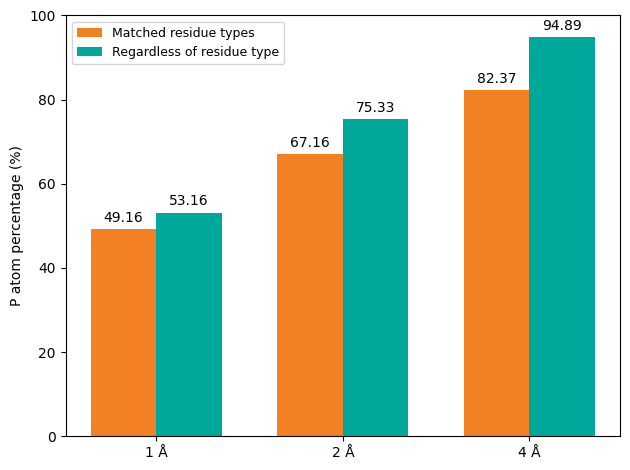

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['1 Å', '2 Å', '4 Å']
orange_values = [49.16, 67.16, 82.37]
cyan_values = [53.16, 75.33, 94.89]

x = np.arange(len(categories))  # 横坐标位置
width = 0.35  # 柱状图的宽度

# 创建图表
fig, ax = plt.subplots()

# 绘制柱状图
bars1 = ax.bar(x - width/2, orange_values, width, label='Matched residue types', color='#F28124')  # 橙色柱
bars2 = ax.bar(x + width/2, cyan_values, width, label='Regardless of residue type', color='#00A89C')  # 青色柱

# 添加标签和标题
ax.set_ylabel('P atom percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)

# 添加图例
ax.legend(loc='upper left', fontsize=9)

# 显示数值标签
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# 调整图像布局
plt.tight_layout()

# 显示图表
plt.show()

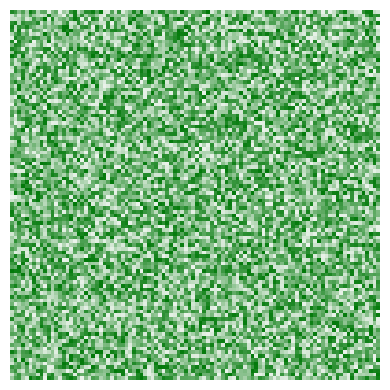

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#热图绘制,自定义颜色区间调节
#自定义值的范围
#这个白边暂时没法代码去除，不过突然发现生成的图片里没有白边

pair_data = np.random.rand(100,100)  #数据在这里准备

plt.figure(figsize=(4, 4))

cmap = sns.light_palette("#017909", as_cmap=True, input="hex", n_colors=256)
cmap.set_under('#EBF3EB')  # 设置非常淡的绿色为渐变的起点

sns.heatmap( pair_data ,cmap=cmap, linewidths=0, vmin=0, vmax=1, 
        xticklabels=False, yticklabels=False, cbar=False)  #标签不显示

#ax.axis('off')

plt.tight_layout()

#plt.savefig('pic/pairwise_pred.png', bbox_inches='tight', pad_inches=0.0, dpi=300 ) #保存图片,pad可以控制白边
plt.show()

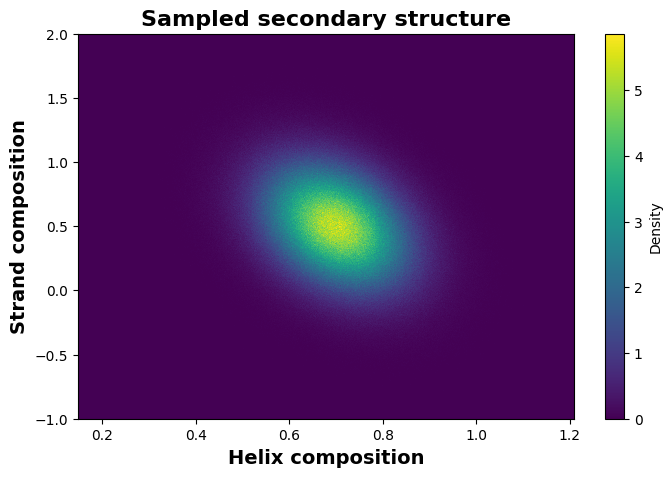

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 模拟数据
np.random.seed(0)
helix = np.random.normal(loc=0.7, scale=0.1, size=10000000)  # 模拟螺旋部分
strand = 1.2 - helix + np.random.normal(loc=0, scale=0.3, size=10000000)  # 模拟链部分

# 数据限制在0-1之间
helix = np.clip(helix, -1, 2)
strand = np.clip(strand, -1, 2)

# 绘制图像
plt.figure(figsize=(8, 5))
plt.hist2d(helix, strand, bins=500, cmap='viridis', density=True)

plt.colorbar(label='Density')
plt.xlabel('Helix composition', fontsize=14, fontweight='bold')
plt.ylabel('Strand composition', fontsize=14, fontweight='bold')
plt.title('Sampled secondary structure', fontsize=16, fontweight='bold')

plt.show()